********************
Accuracy score: 0.8


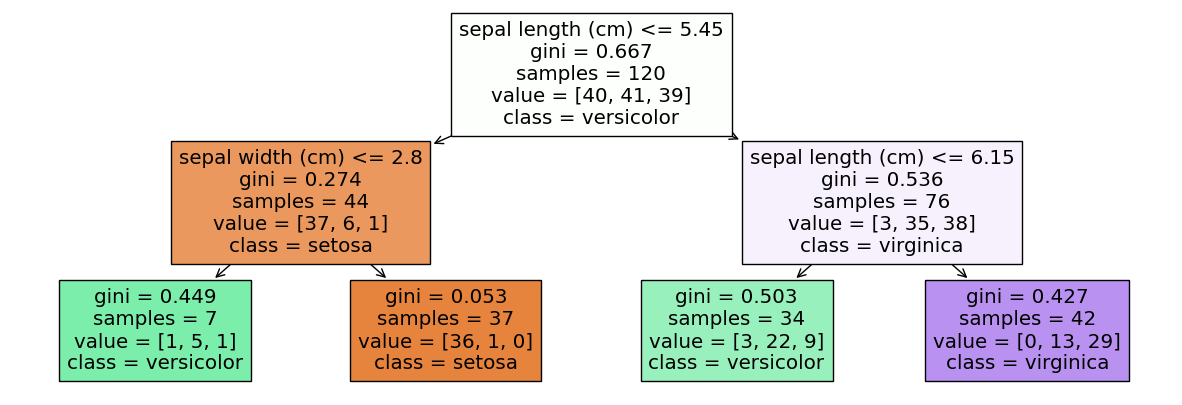

TypeError: Input z must be 2D, not 1D

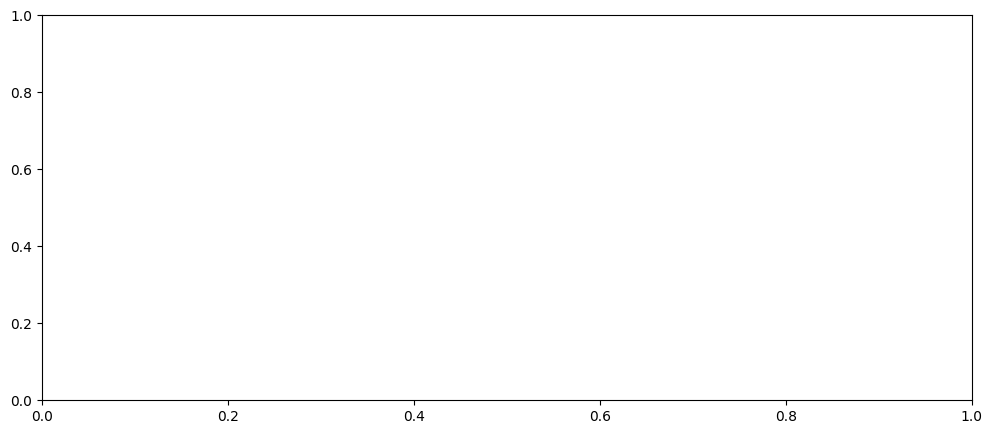

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import export_text
#load the dataset
iris=load_iris()
#creating the independent and the dependent feature
x=iris.data[:, :2] #we only take first two feature
y=iris.target
#split data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Train a Decision tree classifier
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)
#Predict on the testing data
y_pred=clf.predict(x_test)
print("********************")
print("Accuracy score:",accuracy_score(y_test,y_pred))
#plot the decision tree
plt.figure(figsize=(15,5))
#plot_tree(clf,filled=True,feature_names=iris.feature_names[:2],class_names=iris.target_names)
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=np.array(iris.target_names).tolist())
plt.show()
#plot the decision boundary
plt.figure(figsize=(12,5))
x_min,x_max=np.amin(x[:,0]),np.amax(x[:,0])
y_min,y_max=np.amin(x[:,1]),np.amax(x[:,1])
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.8)
plt.scatter(x[:,0],y[:,1],c=y,edgecolors='k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()



In [42]:
r=export_text(clf,feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Check accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


Accuracy: 0.8


InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['setosa', 'versicolor', 'virginica'], dtype='<U10') instead.

<Figure size 1200x800 with 0 Axes>